In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xlrd

In [2]:
df_excel = pd.read_excel('/Users/Jia/Downloads/data_skripsi/tb/data_tb.xlsx')

Convert Datetime (TB)

In [3]:
# Mengonversi kolom 'time' ke tipe data datetime
df_excel['time'] = pd.to_datetime(df_excel['time'])

# Menambahkan kolom 'month'
df_excel['month'] = df_excel['time'].dt.month

# Menambahkan kolom 'year'
df_excel['year'] = df_excel['time'].dt.year

In [4]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     180 non-null    object        
 1   month      180 non-null    int32         
 2   year       180 non-null    int32         
 3   tb         180 non-null    int64         
 4   longitude  180 non-null    float64       
 5   latitude   180 non-null    float64       
 6   time       180 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 8.6+ KB


Merapihkan Data TB 2020-2023

In [5]:
import calendar

In [6]:
# Filter for years 2020-2022
df_tb = df_excel[(df_excel['year'] >= 2020) & (df_excel['year'] <= 2022)]

# Group tb_total by KABKOT, month, and time
tb_total = df_tb.groupby(['KABKOT', 'month', 'time'])['tb'].sum()
tb_total

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    715
                      2021-01-01    329
                      2022-01-01    851
               2      2020-02-01    803
                      2021-02-01    326
                                   ... 
JAKARTA UTARA  11     2021-11-01    475
                      2022-11-01    685
               12     2020-12-01    201
                      2021-12-01    450
                      2022-12-01    671
Name: tb, Length: 180, dtype: int64

Merapihkan Data Kelembapan (rh) 2020-2023

In [8]:
df_rh = pd.read_csv(r'/Users/Jia/Downloads/data_skripsi/kelembaban/dissolved_result_rh_3years.csv')
df_rh = df_rh.drop(['Unnamed: 0'], axis=1)
print(df_rh.columns)

Index(['KABKOT', 'month', 'year', 'longitude', 'latitude', 'rh', 'time'], dtype='object')


In [9]:
# Filter for years 2020-2022
df_rh = df_rh[(df_rh['year'] >= 2020) & (df_rh['year'] <= 2022)]

# Group rh_mean by KABKOT, month, and time
rh_mean = df_rh.groupby(['KABKOT', 'month', 'time'])['rh'].mean()
rh_mean

KABKOT         month  time      
JAKARTA BARAT  1      2020-01-01    85.895006
                      2021-01-01    85.869056
                      2022-01-01    83.321066
               2      2020-02-01    86.136422
                      2021-02-01    86.575353
                                      ...    
JAKARTA UTARA  11     2021-11-01    81.303521
                      2022-11-01    82.045862
               12     2020-12-01    83.099855
                      2021-12-01    83.487948
                      2022-12-01    83.006588
Name: rh, Length: 180, dtype: float64

Merge Files

In [10]:
# Merge DataFrames on 'KABKOT', 'month', and 'time'
df_tb_rh = pd.merge(tb_total, rh_mean, on=['KABKOT', 'month'])
df_tb_rh

tb         rh
KABKOT        month                
JAKARTA BARAT 1      715  85.895006
              1      715  85.869056
              1      715  83.321066
              1      329  85.895006
              1      329  85.869056
...                  ...        ...
JAKARTA UTARA 12     450  83.487948
              12     450  83.006588
              12     671  83.099855
              12     671  83.487948
              12     671  83.006588

[540 rows x 2 columns]

In [11]:
df_tb_rh = df_tb_rh.groupby(['KABKOT', 'month']).agg({'tb':'sum', 'rh':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

In [12]:
df_tb_rh

,KABKOT,month,tb,rh
0,JAKARTA BARAT,1,5685,85.028376
1,JAKARTA BARAT,2,4758,85.414108
2,JAKARTA BARAT,3,5376,83.325529
3,JAKARTA BARAT,4,4578,82.655781
4,JAKARTA BARAT,5,4125,82.746073
5,JAKARTA BARAT,6,4920,82.785458
6,JAKARTA BARAT,7,4272,79.048910
7,JAKARTA BARAT,8,4539,77.938904
8,JAKARTA BARAT,9,5070,78.294391
9,JAKARTA BARAT,10,5145,79.946286


In [13]:
df_tb_rh.shape

(60, 4)

Datetime edit for 'month'

In [14]:
import calendar

# Format for monthly graph
df_tb_rh['month'] = pd.to_datetime(df_tb_rh['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
df_tb_rh = df_tb_rh.set_index('month').reset_index()

In [15]:
df_tb_rh

,month,KABKOT,tb,rh
0,January,JAKARTA BARAT,5685,85.028376
1,February,JAKARTA BARAT,4758,85.414108
2,March,JAKARTA BARAT,5376,83.325529
3,April,JAKARTA BARAT,4578,82.655781
4,May,JAKARTA BARAT,4125,82.746073
5,June,JAKARTA BARAT,4920,82.785458
6,July,JAKARTA BARAT,4272,79.048910
7,August,JAKARTA BARAT,4539,77.938904
8,September,JAKARTA BARAT,5070,78.294391
9,October,JAKARTA BARAT,5145,79.946286


Overlay layer plot for TB and RH

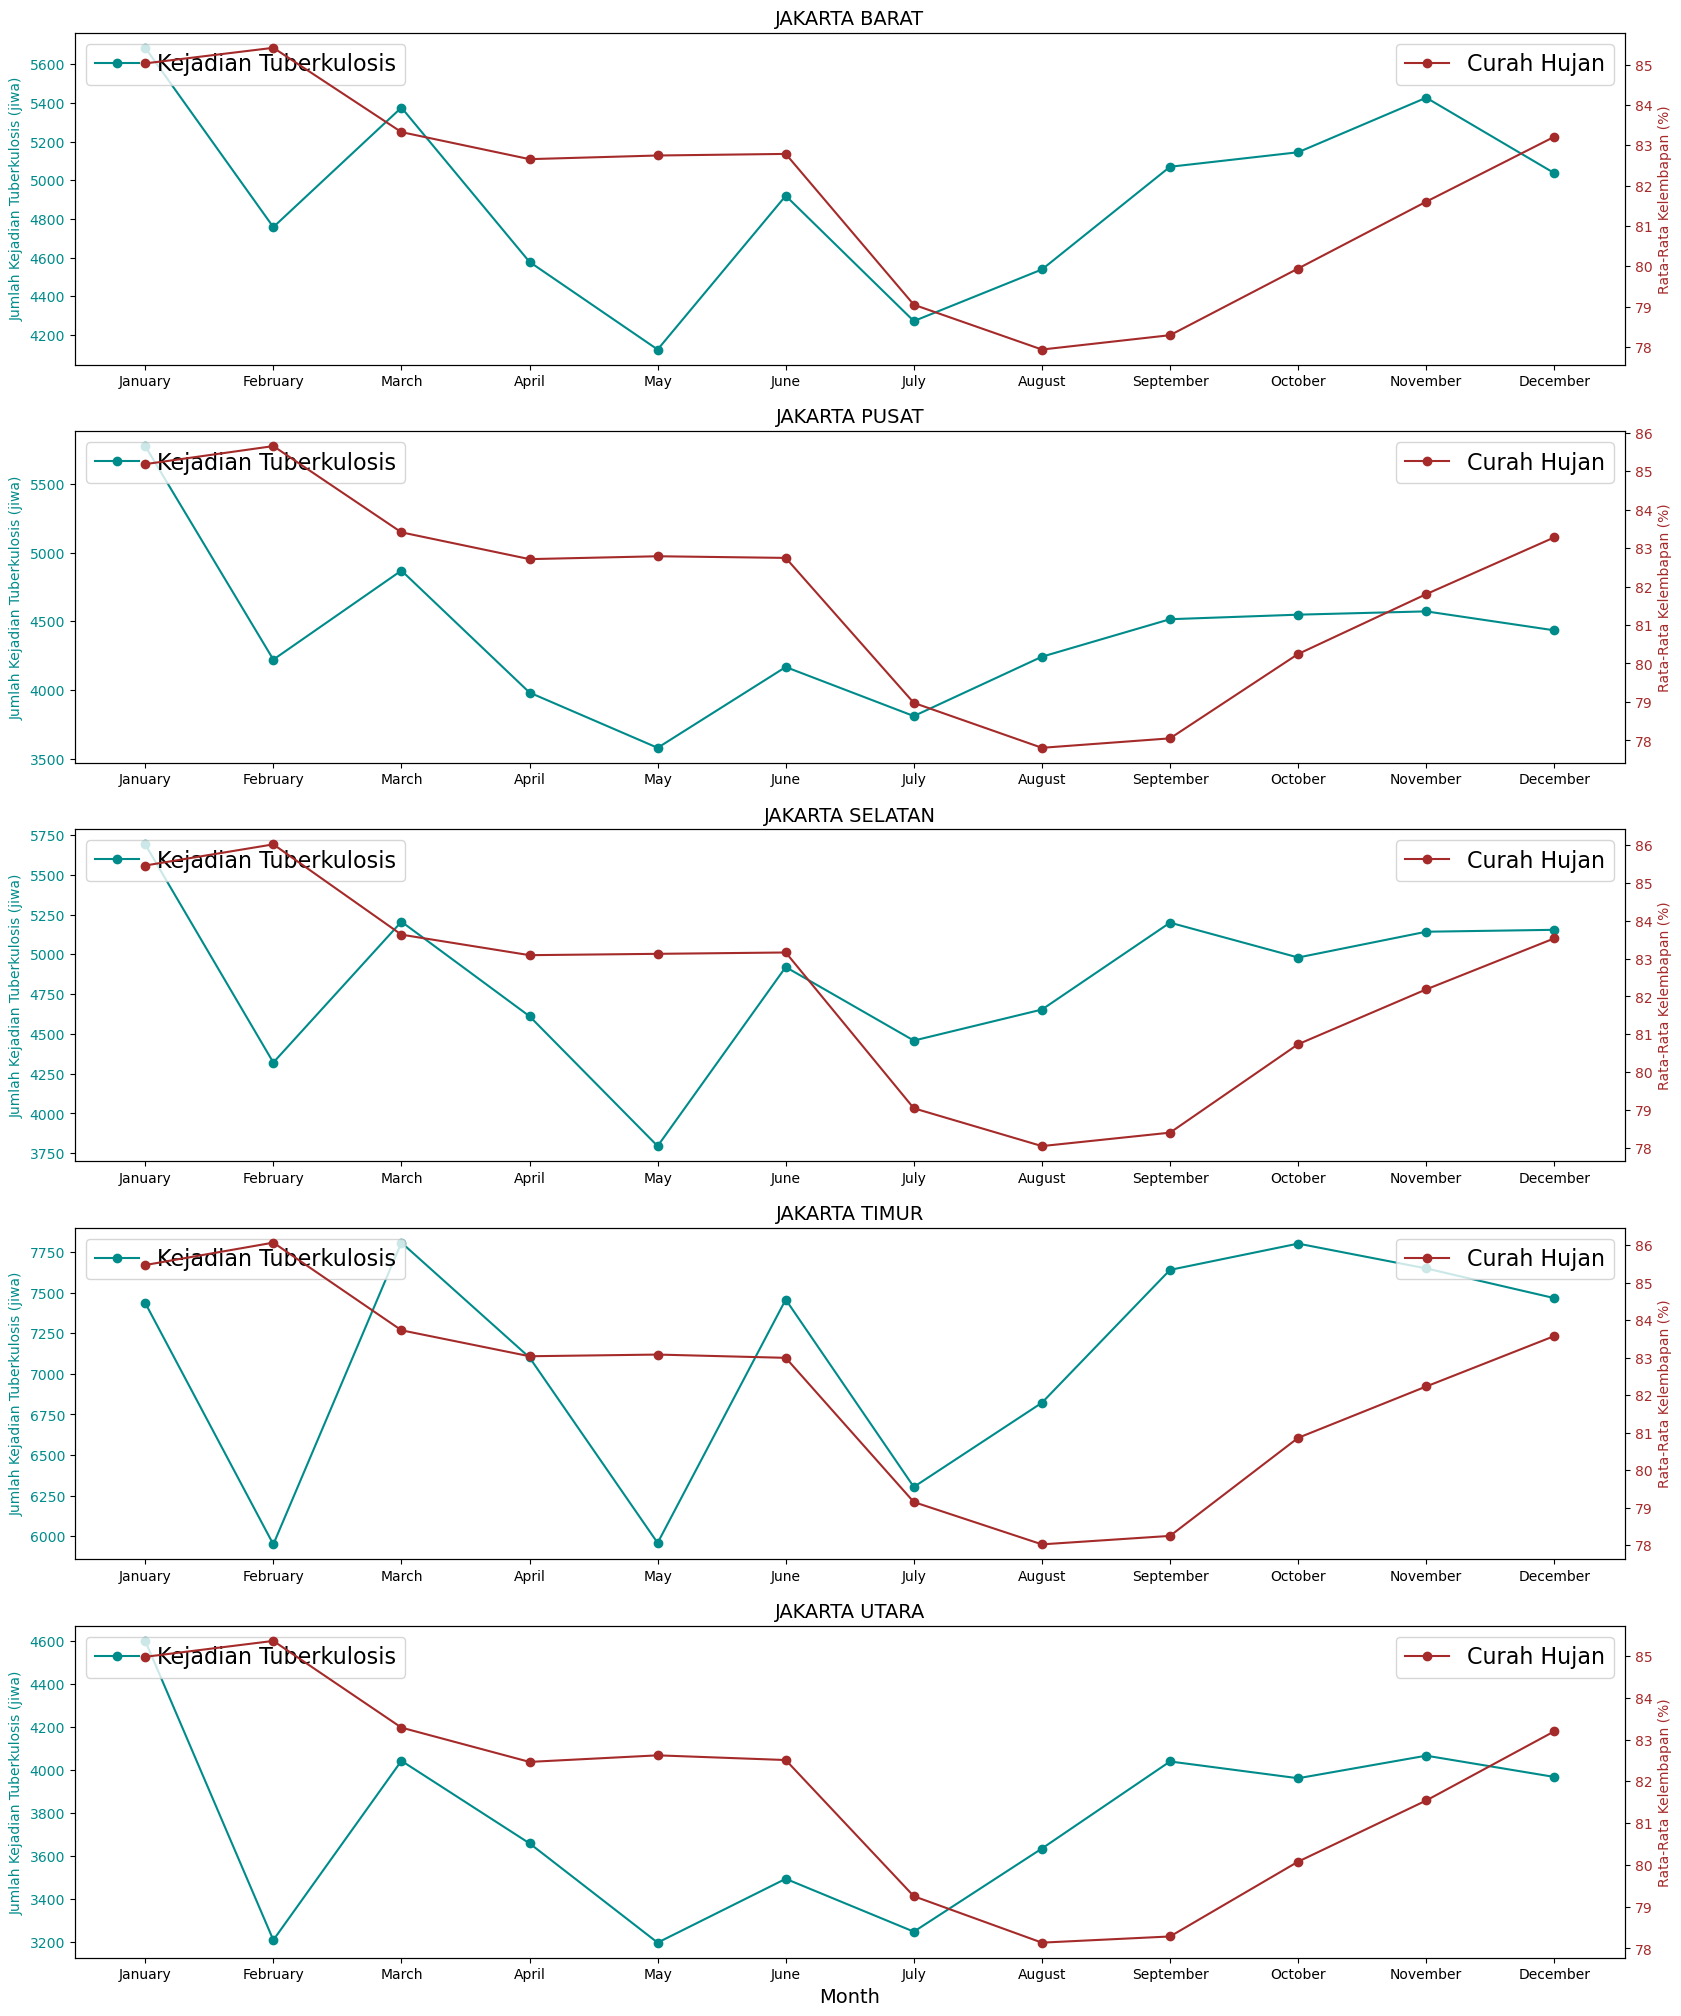

In [16]:
indicators = ['tb', 'rh']

# Group data by KABKOT
grouped_data = df_tb_rh.groupby('KABKOT')

# Plot time series for 'tb' and 'so2' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(20, len(grouped_data)*5), sharex=False, gridspec_kw={'hspace': 0.2})


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['tb']
    y2 = group['rh']

    ax.plot(x, y1, label='Kejadian Tuberkulosis', marker='o', color='darkcyan')
    ax.set_ylabel(f'Jumlah Kejadian Tuberkulosis (jiwa)', color='darkcyan')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='Curah Hujan', marker='o', color='brown')
    ax2.set_ylabel(f'Rata-Rata Kelembapan (%)', color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)
    
# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR',fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', fontsize= 14)

plt.show()